## Data Description
we used the Portuguese Vinho Verde varietal dataset, which include both red and white wines from Kaggle to forecast the wine’s quality.Each sample of wine was rated for quality by wine experts and examined with physicochemical tests. Due to privacy and logistic issues, only data on these physicochemical properties and quality ratings are available   (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

## Columns Description
1. `fixed acidity`: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
2. `volatile acidity`: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
3. `citric acid`: found in small quantities, citric acid can add 'freshness' and flavor to wines
4. `residual sugar`: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
5. `chlorides`: the amount of salt in the wine
6. `free sulfur dioxide`: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
7. `total sulfur dioxide`: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
8. `density`: the density of water is close to that of water depending on the percent alcohol and sugar content
9. `pH`: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
10. `sulphates`: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
11. `alcohol`: the percent alcohol content of the wine
12. `quality`: (score between 0 and 10)

## EDA Questions
- Q1: What chemical characteristics are most important in predicting the quality of wine?
- Q2: Is a certain type of wine (red or white) associated with higher quality?
- Q3: Do wines with higher alcoholic content receive better ratings?
- Q4: Do sweeter wines (more residual sugar) receive better ratings?
- Q5: What level of acidity (pH) is associated with the highest quality?

## Environment Set-up

In [107]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, classification_report, confusion_matrix


from warnings import filterwarnings
filterwarnings(action='ignore')

## Data Wrangling
here, we'd load our data from the CSV file, and dive deeper into it to check for any required cleaning steps.

In [108]:
wine = pd.read_csv('winequalityN.csv')
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [109]:
wine.shape

(6497, 13)

In [110]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [111]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Data Cleaning

In [112]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [113]:
wine=wine.dropna()

In [114]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


- Now that our data is tidy and clean, we are left with 13 columns and 6463 rows for our data to begin the analysis with.

## Data Visualization and EDA
In this section, we'd use summery statistics along with libraries like `matplotlib` and `seaborn` to gain informative insights about our data and answer the EDA questions.


In [115]:
# setting up seaborn configurations
sns.set_style('whitegrid') 

### Q1: What chemical characteristics are most important in predicting the quality of wine?

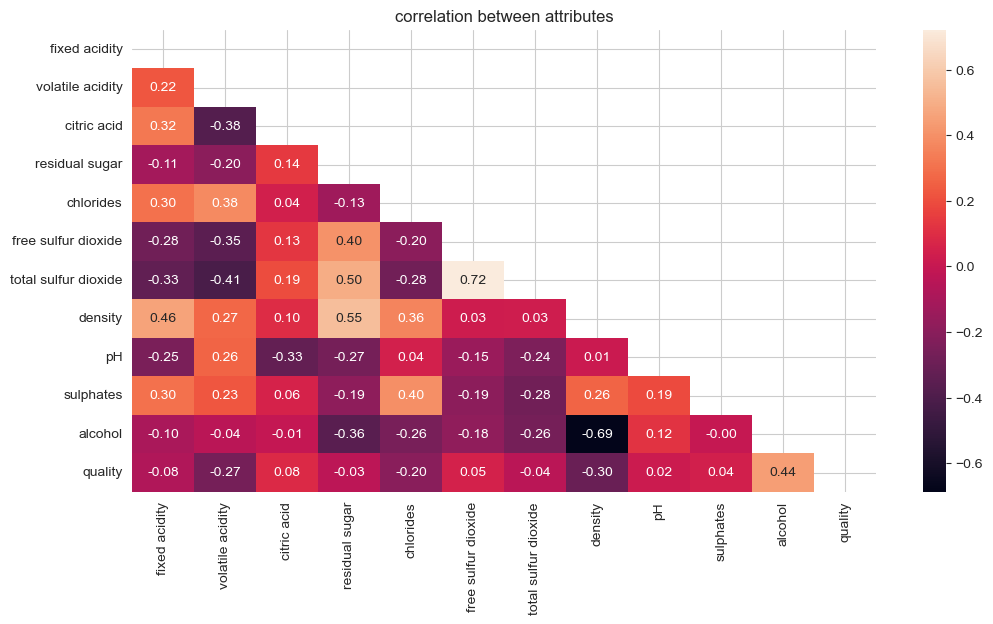

In [116]:
# plotting correlation heatmap
plt.figure(figsize=(12,6))
corr = wine.corr()
mask = np.triu(corr)
sns.heatmap(corr, annot= True, mask= mask, fmt = '.2f')
plt.title("correlation between attributes")
plt.show()

From the above correlation plot, we can easily see if certain attributes are correlated more strongly to wine `quality` than some others.

- strong correlated attributes:
  - `alcohol` and `quality`, and it's clear that this is the highest relation that affects wine quality.


- weak correlated attributes (do not depend on each other):
  - `density` and `alcohol`.
  - `free.sulphur.dioxide` and `citric.acid` has almost no correlation with `quality`


- `density` has strong positive correlation with `residual.sugar` and strong negative correlation with `alcohol`.

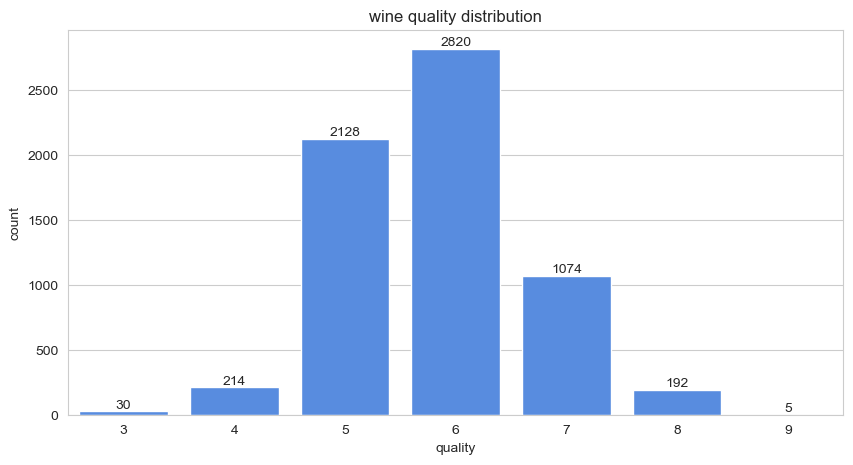

In [117]:
figure = plt.figure(figsize = (10,5))
ax = sns.countplot(x = "quality", data = wine, color = '#4287f5')
plt.title("wine quality distribution")
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

- the vast majority of the wine has a quality of 6, while less numbers has a quality of 9. 

### Q2: Is a certain type of wine (red or white) associated with higher quality?

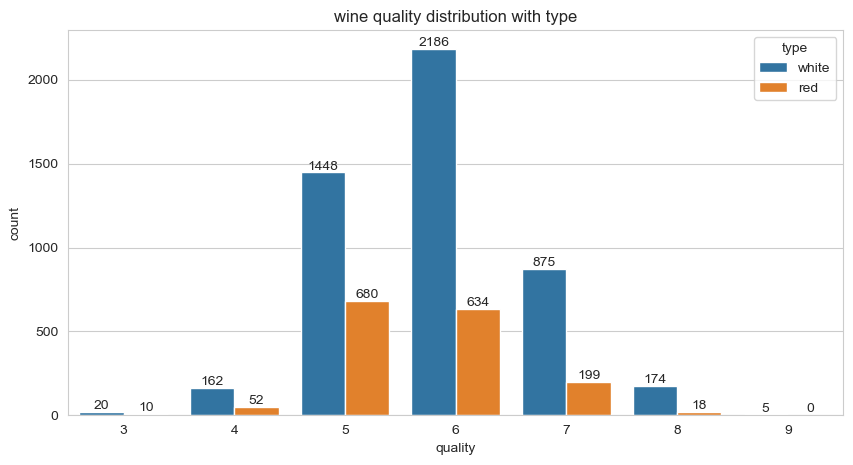

In [118]:
figure = plt.figure(figsize = (10,5))
ax = sns.countplot(x = "quality", hue = "type", data = wine)
plt.title("wine quality distribution with type")
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.show()

- there is noticable deviation between white and red wine counts.
- most of the white wine has a `quality` of 6, while most of the red wine has a `quality` of 5.

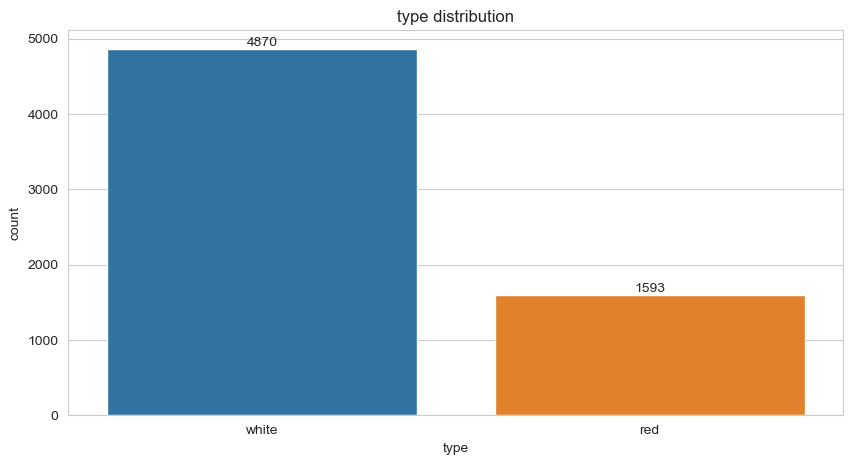

In [119]:
# plotting wine color dist.
figure = plt.figure(figsize = (10,5))
ax = sns.countplot(x = "type", data = wine)
plt.title("type distribution")
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

- we can notice that white wine formes the vast majority of our dataset as it appears in more than 75% of the times.

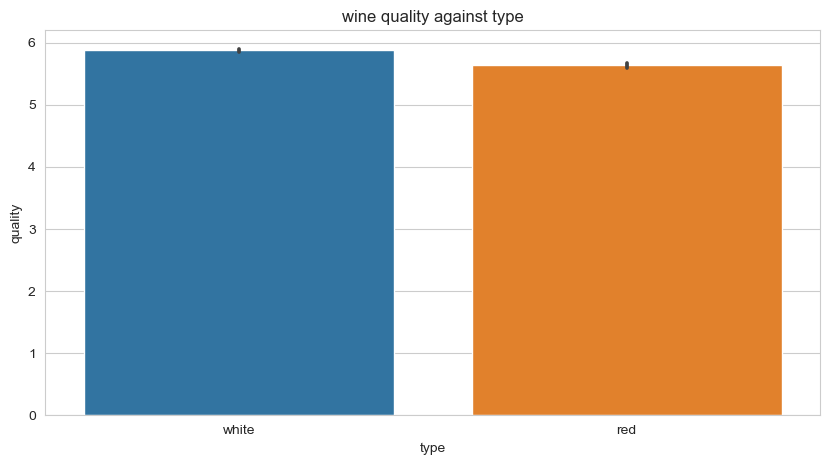

In [120]:
figure = plt.figure(figsize = (10,5))
ax = sns.barplot(x = "type", y = "quality", data = wine)
plt.title("wine quality against type")
plt.show()

In [121]:
wine.groupby('type')['quality'].mean()

type
red      5.636535
white    5.878029
Name: quality, dtype: float64

- the mean quality of red and white wine are versy close.
- white wine has the best mean quality higher than red wine.


### Q3: Do wines with higher alcoholic content receive better ratings?

In [122]:
# viewing stats about alcoholic content
wine['alcohol'].describe()

count    6463.000000
mean       10.492825
std         1.193128
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

- we have the highst alcohol content at 14.9.
- most of the wine has alcoholic content around 10.4.

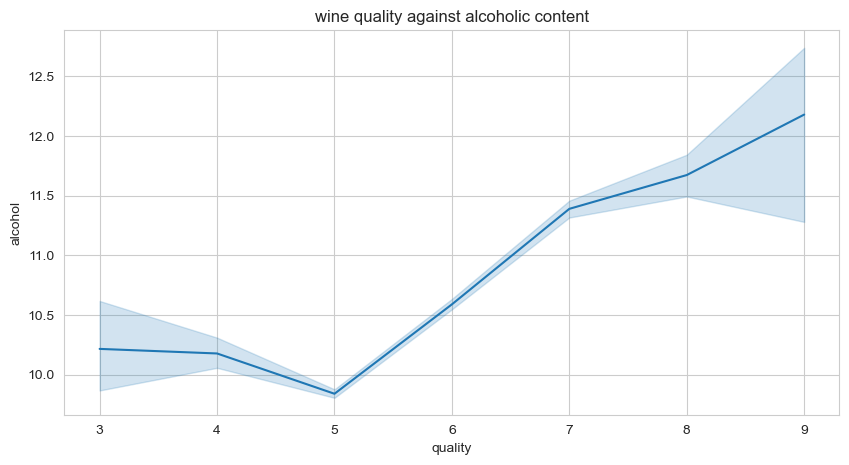

In [123]:
# plotting alcohol and quality
figure = plt.figure(figsize = (10,5))
ax = sns.lineplot(x = "quality", y = "alcohol", data = wine)
plt.title("wine quality against alcoholic content")
plt.show()

- most of our dataset that has a quality of 6 appears to have relatively low acoholic content, but it's still above the mean.
- high alcoholic content only appears in our dataset with high quality wine.

### Q4: Do sweeter wines (more residual sugar) receive better ratings?

In [124]:
wine['residual sugar'].describe()

count    6463.000000
mean        5.443958
std         4.756852
min         0.600000
25%         1.800000
50%         3.000000
75%         8.100000
max        65.800000
Name: residual sugar, dtype: float64

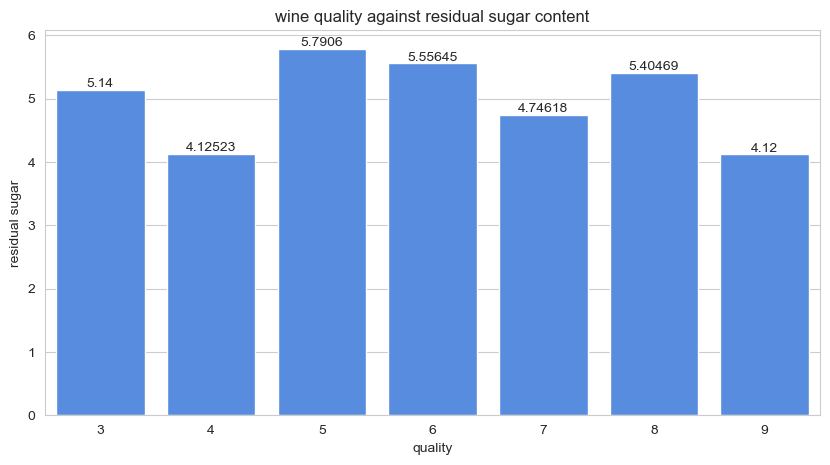

In [125]:
# plotting alcohol and quality
figure = plt.figure(figsize = (10,5))
ax = sns.barplot(x = "quality", y = "residual sugar", data = wine, 
                 color = '#4287f5', ci = None)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("wine quality against residual sugar content")
plt.show()

- we can see that the highest sugar content is tied to a quality of 5, while lower sugar content appears to have respectively higher quality.

### Q5: What level of acidity (pH) is associated with the highest quality?

for better analysis in order to answer this question, we'd cut and categorize `pH` column values according to the following:

|Acidity Label | pH value|
| --- | --- |
|High | Lowest 25% of pH values|
|Average | 25% - 50% of pH values|
|BelowAverage | 50% - 75% of pH values|
|Low | 75% - max pH value|

In [126]:
def catigorize_col (df, col, labels):
    """
    catigorizes a certain column based on its quartiles
   
    Args:
        (df)     df   - dataframe we are proccesing
        (col)    str  - to be catigorized column's name 
        (labels) list - list of labels from min to max
    
    Returns:
        (df)     df   - dataframe with the categorized col
    """
    
    # setting the edges to cut the column accordingly
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    
    df['Level'] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
    return df

In [127]:
# define pH labels
labels = ['High', 'Average', 'BelowAverage', 'Low']

# categorize values
catigorize_col(wine, 'pH', labels)

# confirm changes
wine['Level'].dtype

CategoricalDtype(categories=['High', 'Average', 'BelowAverage', 'Low'], ordered=True)

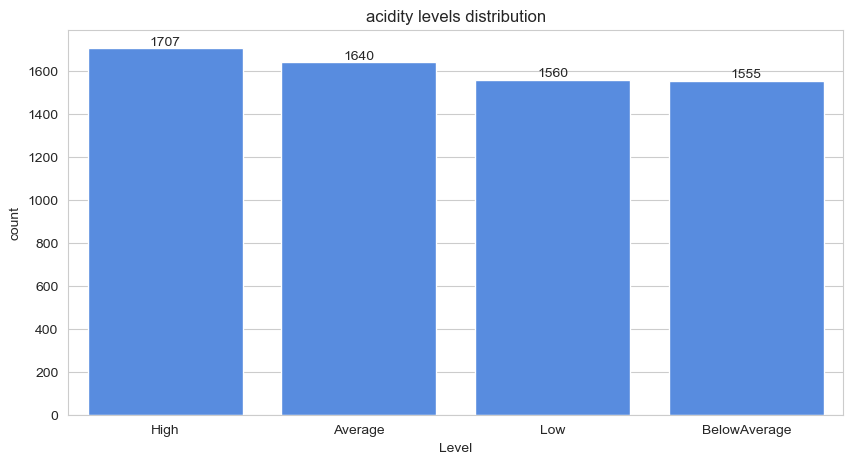

In [128]:
# plotting acidity dist
figure = plt.figure(figsize = (10,5))
ax = sns.countplot(x = "Level", data = wine, color = '#4287f5',
                   order = wine['Level'].value_counts().index,)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("acidity levels distribution")
plt.show()

- most of the wine in our dataset has high acidity level

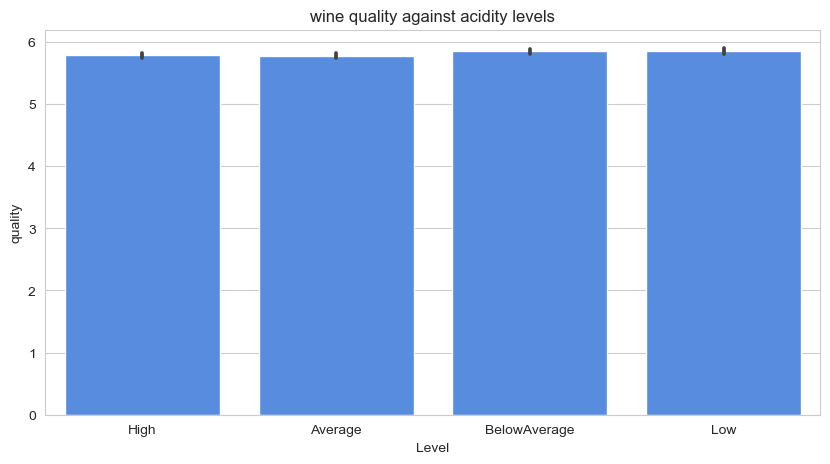

In [129]:
# plotting quality against acidity levels in pH
figure = plt.figure(figsize = (10,5))
ax = sns.barplot(y = "quality", x = "Level", data = wine, color = '#4287f5')
plt.title("wine quality against acidity levels")
plt.show()

In [130]:
# Find the mean quality of each acidity level in pH with groupby
wine.groupby('Level')['quality'].mean()

Level
High            5.786175
Average         5.782927
BelowAverage    5.850804
Low             5.858974
Name: quality, dtype: float64

- it's clear that all four acidity levels has close mean quality, but the Low acidity level has the highest quality in our dataset.

## Predictive Analysis

### Feature Selection

In [131]:
# Create Classification version of target variable
wine['goodquality'] = [1 if x >= 7 else 0 for x in wine['quality']]# Separate feature variables and target variable
X = wine.drop(['quality','goodquality','type','Level'], axis = 1) #feature variable
y = wine['goodquality'] #target variable

In [132]:
# See proportion of good vs not good wines
wine['goodquality'].value_counts()

0    5192
1    1271
Name: goodquality, dtype: int64

### Feature importance

In [133]:
classifiern = ExtraTreesClassifier()
classifiern.fit(X,y)
score = classifiern.feature_importances_
print(score)

[0.07143879 0.08748677 0.07802831 0.07997412 0.07903207 0.07968713
 0.07918809 0.10255113 0.08003289 0.08273681 0.17984388]


### Splitting Dataset

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=7)

### Logistic Regression

In [135]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
print("Accuracy Score:", accuracy1)
precision1 = precision_score(y_test, y_pred1)
print("Precision Score:", precision1)
recall1 = recall_score(y_test, y_pred1)
print("Recall Score:", recall1)
f1_1 = f1_score(y_test, y_pred1)
print("F1 Score:", f1_1)
conf_matrix1 = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:\n", conf_matrix1)

Accuracy Score: 0.8179473955647241
Precision Score: 0.5789473684210527
Recall Score: 0.1778975741239892
F1 Score: 0.2721649484536082
Confusion Matrix:
 [[1520   48]
 [ 305   66]]


### K_Nearest_Neighborhood

In [136]:
model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy Score:", accuracy2)
precision2 = precision_score(y_test, y_pred2)
print("Precision Score:", precision2)
recall2 = recall_score(y_test, y_pred2)
print("Recall Score:", recall2)
f1_2 = f1_score(y_test, y_pred2)
print("F1 Score:", f1_2)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:\n", conf_matrix2)

Accuracy Score: 0.8045384218669417
Precision Score: 0.4868421052631579
Recall Score: 0.39892183288409705
F1 Score: 0.43851851851851853
Confusion Matrix:
 [[1412  156]
 [ 223  148]]


### Support Vector Classifier

In [137]:
model3 = SVC()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy Score:", accuracy3)
precision3 = precision_score(y_test, y_pred3)
print("Precision Score:", precision3)
recall3 = recall_score(y_test, y_pred3)
print("Recall Score:", recall3)
f1_3 = f1_score(y_test, y_pred3)
print("F1 Score:", f1_3)
conf_matrix3 = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:\n", conf_matrix3)

Accuracy Score: 0.8086642599277978
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0
Confusion Matrix:
 [[1568    0]
 [ 371    0]]


### Decision Tree

In [138]:

model4 = DecisionTreeClassifier(criterion='entropy')
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
print("Accuracy Score:", accuracy4)
precision4 = precision_score(y_test, y_pred4)
print("Precision Score:", precision4)
recall4 = recall_score(y_test, y_pred4)
print("Recall Score:", recall4)
f1_4 = f1_score(y_test, y_pred4)
print("F1 Score:", f1_4)
conf_matrix4 = confusion_matrix(y_test, y_pred4)
print("Confusion Matrix:\n", conf_matrix4)

Accuracy Score: 0.8236204228984012
Precision Score: 0.5367088607594936
Recall Score: 0.5714285714285714
F1 Score: 0.5535248041775457
Confusion Matrix:
 [[1385  183]
 [ 159  212]]


### Gaussian NB

In [139]:
model5 = GaussianNB()
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
accuracy5 = accuracy_score(y_test, y_pred5)
print("Accuracy Score:", accuracy5)
precision5 = precision_score(y_test, y_pred5)
print("Precision Score:", precision5)
recall5 = recall_score(y_test, y_pred5)
print("Recall Score:", recall5)
f1_5 = f1_score(y_test, y_pred5)
print("F1 Score:", f1_5)
conf_matrix5 = confusion_matrix(y_test, y_pred5)
print("Confusion Matrix:\n", conf_matrix5)

Accuracy Score: 0.7462609592573491
Precision Score: 0.3947826086956522
Recall Score: 0.6118598382749326
F1 Score: 0.4799154334038055
Confusion Matrix:
 [[1220  348]
 [ 144  227]]


### Random Forest Classifier

In [140]:
model6 = RandomForestClassifier()
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
accuracy6 = accuracy_score(y_test, y_pred6)
print("Accuracy Score:", accuracy6)
precision6 = precision_score(y_test, y_pred6)
print("Precision Score:", precision6)
recall6 = recall_score(y_test, y_pred6)
print("Recall Score:", recall6)
f1_6 = f1_score(y_test, y_pred6)
print("F1 Score:", f1_6)
conf_matrix6 = confusion_matrix(y_test, y_pred6)
print("Confusion Matrix:\n", conf_matrix6)

Accuracy Score: 0.888602372356885
Precision Score: 0.7881040892193308
Recall Score: 0.5714285714285714
F1 Score: 0.6624999999999999
Confusion Matrix:
 [[1511   57]
 [ 159  212]]


### XGboost Classifier

In [141]:
model7 = xgb.XGBClassifier()
model7.fit(X_train, y_train)
y_pred7 = model7.predict(X_test)
accuracy7 = accuracy_score(y_test, y_pred7)
print("Accuracy Score:", accuracy7)
precision7 = precision_score(y_test, y_pred7)
print("Precision Score:", precision7)
recall7 = recall_score(y_test, y_pred7)
print("Recall Score:", recall7)
f1_7 = f1_score(y_test, y_pred7)
print("F1 Score:", f1_7)
conf_matrix7 = confusion_matrix(y_test, y_pred7)
print("Confusion Matrix:\n", conf_matrix7)

Accuracy Score: 0.8767405879319237
Precision Score: 0.7049689440993789
Recall Score: 0.6118598382749326
F1 Score: 0.6551226551226551
Confusion Matrix:
 [[1473   95]
 [ 144  227]]


### Comparing the classification system

In [142]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree' ,'GaussianNB','Random Forest','Xgboost'],
    'Score': [0.818,0.805,0.809,0.827,0.746,0.888,0.877]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.888,Random Forest
0.877,Xgboost
0.827,Decision Tree
0.818,Logistic Regression
0.809,SVC
0.805,KNN
0.746,GaussianNB


### Prediction Model

In [143]:
# Assuming X_new is the data you want to predict on
to_predict = np.array([13.7,0.415,0.68,2.9,0.085,17,43,1.0014,3.06,0.8,10])

reshaped_data = to_predict.reshape(1, -1)

# Make predictions
prediction = model6.predict(reshaped_data)
print(prediction)

[0]


### Conclusion
In addition to the exploratory analysis, predictive modeling reinforced that alcohol content is the strongest predictor of wine quality, followed by type and acidity levels. White wines consistently received slightly higher ratings than red wines, while wines with higher alcohol content and lower acidity were more likely to have higher quality scores. However, sweetness (residual sugar) did not contribute positively to quality predictions. The predictive analysis confirms that alcohol is the most significant factor, making it a key attribute in determining the quality of wine.